In [3]:
import warnings

import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


## Read in data file

In [9]:
PlioMIP2_TS=xr.open_dataset('PlioMIP2_TS.nc')
PlioMIP2_TS.Plio_TS

<xarray.DataArray 'Plio_TS' (model: 14, month: 12, lat: 181, lon: 360)>
[10946880 values with dtype=float64]
Coordinates:
  * model    (model) object 'ds_month_CESM_1_2_MODEL' ... 'ds_month_NorESM_L_...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0

## Create Weighted Means for Model and Control 

## CONTROL ZONAL MEAN 

## How to create weighted means using NUMPY Array for Control

In [10]:
PI_TS_ZM = np.mean(PlioMIP2_TS.PI_TS, axis=3)

lat=PlioMIP2_TS.lat
latr = np.deg2rad(lat)
weight = np.cos(latr)
PI_TS_GM=np.average(PI_TS_ZM, axis=2,weights=weight)

#Get Annual Mean 
PI_TS_GM_AM = np.mean(PI_TS_GM, axis=1)


## How to create weighted means using XAARAY Dataset for Control

In [11]:
weights = np.cos(np.deg2rad(PlioMIP2_TS['PI_TS'].lat))
weights.dims

('lat',)

In [12]:
control_weighted = PlioMIP2_TS['PI_TS'].weighted(weights)
control_weighted

DataArrayWeighted with weights along dimensions: lat

In [13]:
control=control_weighted.mean(dim=("lon", "lat"))

In [14]:
control=control.mean(axis=1)

# MODEL ZONAL MEAN 

## How to create weighted means using NUMPY Array for Model

In [15]:
Plio_TS_ZM = np.mean(PlioMIP2_TS.Plio_TS, axis=3)

lat=PlioMIP2_TS.lat
latr = np.deg2rad(lat)
weight = np.cos(latr)
Plio_TS_GM=np.average(Plio_TS_ZM, axis=2,weights=weight)

#Get Annual Mean 
Plio_TS_GM_AM = np.mean(Plio_TS_GM, axis=1)

## How to create weighted means using XAARAY Dataset for Model

In [16]:
weights_m = np.cos(np.deg2rad(PlioMIP2_TS['Plio_TS'].lat))
weights_m.dims

('lat',)

In [17]:
model_weighted = PlioMIP2_TS['Plio_TS'].weighted(weights_m)
model_weighted

DataArrayWeighted with weights along dimensions: lat

In [18]:
model=model_weighted.mean(dim=("lon", "lat"))

In [19]:
model=model.mean(axis=1)

In [20]:
model.values

array([291.32869245, 290.67260782, 289.93735468, 291.29733206,
       288.58957775, 287.54357032, 288.49536201, 293.62365856,
       290.72943358, 292.40208888, 289.79102012, 290.06775656,
       289.24909984, 287.7452853 ])

# Remove extra letters from model values

In [21]:
#print(model.model.values)
xticlab=[x[9:] for x in model.model.values]
#print(xticlab)

# Defining Global Mean Surface Temperature High and Low Anoms Threshold

In [22]:
ds_anoms=model-control
#ds_anoms.model

In [23]:
idx_high=PlioMIP2_TS.model.values[np.where(ds_anoms.values>=3)[0]]
idx_low=PlioMIP2_TS.model.values[np.where(ds_anoms.values<=3)[0]]

In [24]:
#print(idx_high)

In [25]:
high=PlioMIP2_TS.sel(model=idx_high)
high=high.mean(dim=("model", "month"))

low=PlioMIP2_TS.sel(model=idx_low)
low=low.mean(dim=("model", "month"))

In [26]:
print(high)
print(low)

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    Plio_TS  (lat, lon) float64 230.7 230.7 230.7 230.7 ... 264.6 264.6 264.6
    PI_TS    (lat, lon) float64 226.0 226.1 226.1 226.1 ... 252.6 252.6 252.6
<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    Plio_TS  (lat, lon) float64 229.9 229.9 229.9 229.9 ... 260.1 260.1 260.1
    PI_TS    (lat, lon) float64 227.4 227.4 227.4 227.4 ... 252.6 252.6 252.6


Composite of Mean Surface Temperature Change (HIGH)

Text(0.5, 1.0, 'Composite of Mean Surface Temperature Change High ')

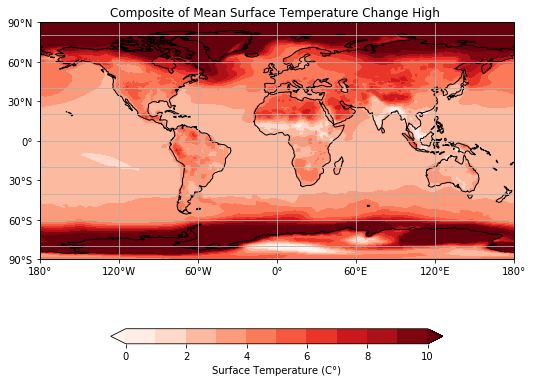

In [27]:
# Make the figure larger
fig = plt.figure(figsize=(8.5,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=high.Plio_TS-high.PI_TS
data, lons = add_cyclic_point(data, coord=high['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, high['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperature Change High ')
#plt.savefig('CompGlobalmean_surf_temp_high.png')

Text(0.5, 1.0, 'Composite of Mean Surface Temperature Change Low')

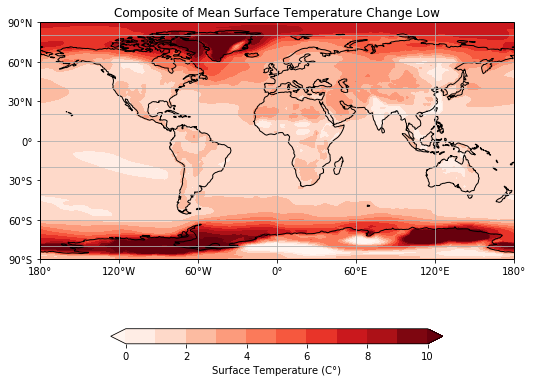

In [28]:
# Make the figure larger
fig = plt.figure(figsize=(8.5,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=low.Plio_TS-low.PI_TS
data, lons = add_cyclic_point(data, coord=low['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, low['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperature Change Low')
#plt.savefig('CompGlobalmean_surf_temp_low.png')

Composite of Mean Surface Temperature Change Difference (high-low)

Text(0.5, 1.0, 'Composite of Mean Surface Temperature Difference High - Low')

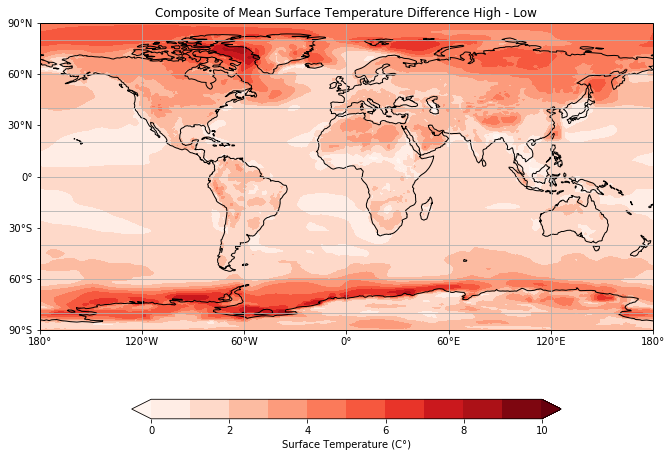

In [29]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=(high.Plio_TS-high.PI_TS)-(low.Plio_TS-low.PI_TS)
data, lons = add_cyclic_point(data, coord=low['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, low['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperature Difference High - Low')
#plt.savefig('CompGlobalmean_surf_temp_diff.png')

Composite of Mean Surface Temperatures Difference Weighted

Text(0.5, 1.0, 'Composite of Mean Surface Temperatures Difference Weighted')

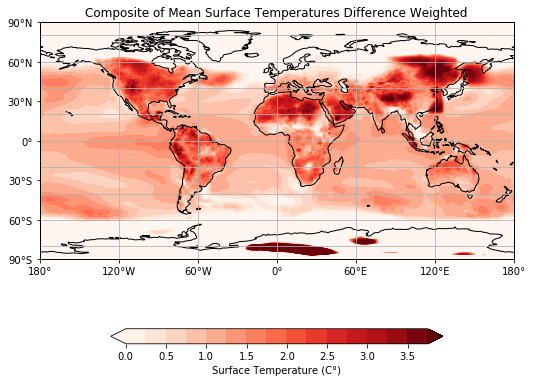

In [30]:
# Make the figure larger
fig = plt.figure(figsize=(8.5,8.5))

clevs=np.arange(0,4,0.25)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=(high.Plio_TS-high.PI_TS)-(low.Plio_TS-low.PI_TS)/weights_m
data, lons = add_cyclic_point(data, coord=low['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, low['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperatures Difference Weighted')
#plt.savefig('CompGlobalmean_surf_temp_diff_weight.png')